[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GabrielVieiraSantell\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


              Model Names  50% Values  Area Ratios  F1 Scores
0              Kernel_SVM    0.786408     0.771402   0.752809
1     Logistic_Regression    0.786408     0.759445   0.769231
2  Support_Vector_Machine    0.796117     0.749634   0.790000
3           Random_Forest    0.766990     0.731340   0.725146
4           Decision_Tree    0.718447     0.485965   0.742268
5             Naive_Bayes    0.669903     0.454267   0.771186
6     K_Nearest_Neighbors    0.621359     0.427798   0.632124


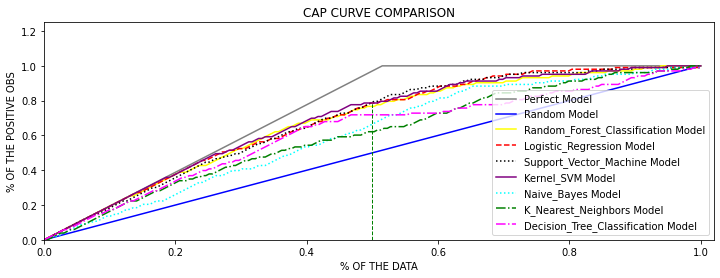

In [1]:
#Python Code for CAP Analysis

#HOW TO USE
#open a new folder in your current folder (mine name is "CAP_analysis) and save the code below (I saved as "CapCalculator .py" in there. Then you can call the code just like you call numpy library.
#ex: from CAP_analysis.CapCalculator import CAP

#------------------------------------------------------------------------------------------------------------

#EXAMPLE APPLICATION
#This example belongs to the natural Language processing part but you can use this Cap analysis class for any model for any case. Here is the example application code below.

# IMPORTING THE LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#---------------------------------------------------------------
 
# IMPORTING THE DATASET
# delimiter = '\t' is used to specify that file is a .tsv file
# quoting = 3 is used to ignore " chareter in the file. If there are other characters search what number we also add just like 3
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)
#print(dataset.shape) # = (1000, 2)
#---------------------------------------------------------------
 
# CLEANING THE TEXTS
import re # is used to simplfy the reviews
import nltk # is used to get rid of stop words that not help us just like "the", "a", "an" ...
nltk.download('stopwords') #downloads stop words
from nltk.corpus import stopwords # imports downloaded stop wprds to code
from nltk.stem.porter import PorterStemmer # is for simplifying reviews by changing all words to present tense (loved-->love)
 
corpus = [] # stores all reviews but all cleaned
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i]) # replace every punctuation with space, ^a-zA-Z means anything that is NOT these(a-zA-Z)
    review = review.lower() # updates all upper cases with lower case words
    review = review.split() # split each word
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english') # save all stop words in english into set
    all_stopwords.remove('not') # since not is important exclude "not" from the set
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)] #stem all words in sentence except stop words
    review = ' '.join(review) # cahnge to sentence from matrix of string
    corpus.append(review)
#---------------------------------------------------------------
 
# CREATING THE BAG OF WORDS MODEL
# We want to get rid of the words that are not usefull like names
# that's why we are creating bag of words from most frequently used words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500) # actualyy there are 1566 words in all data but we are just picking the most frequently used 1500 ones
X = cv.fit_transform(corpus).toarray() # fit method take all the words from the corpus and transform method put all these into the columns
#print(X[0]) # Will give array like this [0 0 0 ..., 0 0 0] like explained in the https://www.udemy.com/course/machinelearning/learn/lecture/20091386#questions/12416212
y = dataset.iloc[:, -1].values
#---------------------------------------------------------------
 
# SPLITTING THE DATASET INTO THE TRAINING SET AND TEST SET
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
 
# TRAINING THE MODEL
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
 
classifier_1 = LogisticRegression(random_state = 0).fit(X_train, y_train) # Logistic_Regression Model
classifier_2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2).fit(X_train, y_train) # K_Nearest_Neighbors
classifier_3 = SVC(kernel = 'linear', probability=True, random_state = 0).fit(X_train, y_train) # Support_Vector_Machine
classifier_4 = SVC(kernel = 'rbf', probability=True, random_state = 0).fit(X_train, y_train) # Kernel_SVM
classifier_5 = GaussianNB().fit(X_train, y_train) # Naive_Bayes
classifier_6 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0).fit(X_train, y_train) # Decision_Tree_Classification
classifier_7 = RandomForestClassifier(n_estimators = 100, criterion='entropy', random_state=0).fit(X_train, y_train) # Random_Forest_Classification
 
# GET PREDICTIONS OF THE MODELS
y_pred_1 = classifier_1.predict(X_test)
y_pred_2 = classifier_2.predict(X_test)
y_pred_3 = classifier_3.predict(X_test)
y_pred_4 = classifier_4.predict(X_test)
y_pred_5 = classifier_5.predict(X_test)
y_pred_6 = classifier_6.predict(X_test)
y_pred_7 = classifier_7.predict(X_test)
 
# GET PROBABILITIES FOR THE RESULTS CALCULATED BY THE MODEL(Result matrix is decribed below)
# [[0 probabilty , 1 probabilty ] For 1. result calculated by the model
#  [0.1 for eg   , 0.9 for eg   ] For 2. result calculated by the model (for this, prediction is 1 because probabilty is higher for 1)
#  [............ , ..........   ] For 3. result calculated by the model
#  [............ , ..........   ] 
#  [............ , ..........   ] For (n-1). result calculated by the model
#  [0 probabilty , 1 probabilty ]]For (n). result calculated by the model
y_pred_proba_1 = classifier_1.predict_proba(X=X_test)
y_pred_proba_2 = classifier_2.predict_proba(X=X_test)
y_pred_proba_3 = classifier_3.predict_proba(X=X_test)
y_pred_proba_4 = classifier_4.predict_proba(X=X_test)
y_pred_proba_5 = classifier_5.predict_proba(X=X_test)
y_pred_proba_6 = classifier_6.predict_proba(X=X_test)
y_pred_proba_7 = classifier_7.predict_proba(X=X_test)
 
# GET CAP ANALYSIS RESULTS
from CAP_analysis.CapCalculator import CAP
cap = CAP(y_test)
ideal_x, ideal_y = cap.ideal() # for best possible result graph
x_axis = cap.x_val()           # for the values on the x_axis between 0-1
yy_1 = cap.analyse(y_pred_proba_1) # for the percentage of positive results for specifed model
yy_2 = cap.analyse(y_pred_proba_2)
yy_3 = cap.analyse(y_pred_proba_3)
yy_4 = cap.analyse(y_pred_proba_4)
yy_5 = cap.analyse(y_pred_proba_5)
yy_6 = cap.analyse(y_pred_proba_6)
yy_7 = cap.analyse(y_pred_proba_7)
 
# GET VALUE CORRESPONDS TO 0.5 (50%) FOR COMPARE THE SUCCESS OF THE MODEL
fifty_1 = cap.fifty_percent(y_pred_proba_1)
fifty_2 = cap.fifty_percent(y_pred_proba_2)
fifty_3 = cap.fifty_percent(y_pred_proba_3)
fifty_4 = cap.fifty_percent(y_pred_proba_4)
fifty_5 = cap.fifty_percent(y_pred_proba_5)
fifty_6 = cap.fifty_percent(y_pred_proba_6)
fifty_7 = cap.fifty_percent(y_pred_proba_7)
 
# GET THE RATIO OF AREAS OF THE BEST MODEL AND INPUT MODEL FOR COMPARE THE SUCCESS OF THE MODEL
ar_1 = cap.area_ratio(y_pred_proba_1)
ar_2 = cap.area_ratio(y_pred_proba_2)
ar_3 = cap.area_ratio(y_pred_proba_3)
ar_4 = cap.area_ratio(y_pred_proba_4)
ar_5 = cap.area_ratio(y_pred_proba_5)
ar_6 = cap.area_ratio(y_pred_proba_6)
ar_7 = cap.area_ratio(y_pred_proba_7)
 
# GET F1 SCORES OF THE RESULTS
F1Score_1 = cap.F1_score(y_pred_1)
F1Score_2 = cap.F1_score(y_pred_2)
F1Score_3 = cap.F1_score(y_pred_3)
F1Score_4 = cap.F1_score(y_pred_4)
F1Score_5 = cap.F1_score(y_pred_5)
F1Score_6 = cap.F1_score(y_pred_6)
F1Score_7 = cap.F1_score(y_pred_7)
 
# DISPLAY THE RESULTS
# Display the Values Corresponds to 0.5 (50%) and the Ratio of the areas
model_names    = ["Logistic_Regression", "K_Nearest_Neighbors", "Support_Vector_Machine", "Kernel_SVM" ,"Naive_Bayes", "Decision_Tree", "Random_Forest"]
fifty_results = [fifty_1,fifty_2,fifty_3,fifty_4,fifty_5,fifty_6,fifty_7]
ar_results    = [ar_1,ar_2,ar_3,ar_4,ar_5,ar_6,ar_7]
F1_results    = [F1Score_1,F1Score_2,F1Score_3,F1Score_4,F1Score_5,F1Score_6,F1Score_7]
results = pd.DataFrame({'Model Names':model_names,'50% Values':fifty_results,'Area Ratios':ar_results, 'F1 Scores':F1_results})
results = results.sort_values(by=['Area Ratios'], ascending=False).reset_index(drop=True)
print(results)
 
# Plot the results
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(12,4))
ax.plot(ideal_x,ideal_y, color='grey', label='Perfect Model')
ax.plot(x_axis,x_axis, color='blue', label='Random Model')
ax.plot(x_axis,yy_7, color='yellow', linestyle="solid", label='Random_Forest_Classification Model')     #1
ax.plot(x_axis,yy_1, color='red', linestyle="dashed", label='Logistic_Regression Model')                #2
ax.plot(x_axis,yy_3, color='black', linestyle="dotted",label='Support_Vector_Machine Model')            #3
ax.plot(x_axis,yy_4, color='purple', label='Kernel_SVM Model')                                          #4
ax.plot(x_axis,yy_5, color='cyan', linestyle="dotted", label='Naive_Bayes Model')                       #5
ax.plot(x_axis,yy_2, color='green', linestyle="dashdot", label='K_Nearest_Neighbors Model')             #6
ax.plot(x_axis,yy_6, color='magenta', linestyle="dashdot", label='Decision_Tree_Classification Model')  #7
 
ax.plot([0.5, 0.5], [0.0, fifty_1], color='green', linestyle='--', linewidth=1)
#ax.plot([0, 0.5], [fifty_1, fifty_1], color='green', linestyle='--', linewidth=1, label=str(fifty_1*100)+'% OF positive obs at '+str(50)+'%')
 
plt.xlim(0, 1.02)
plt.ylim(0, 1.25)
plt.title("CAP CURVE COMPARISON")
plt.xlabel('% OF THE DATA')
plt.ylabel('% OF THE POSITIVE OBS')
plt.legend()
plt.show()
#------------------------------------------------------------------------------------------------------------